In [1]:
# let's set things up
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

%matplotlib inline
plt.style.use('default')
sns.set()

In [2]:
# get the iris dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['species'] = df_iris['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df_iris.drop('target', axis=1, inplace=True)

# print(type(iris))
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

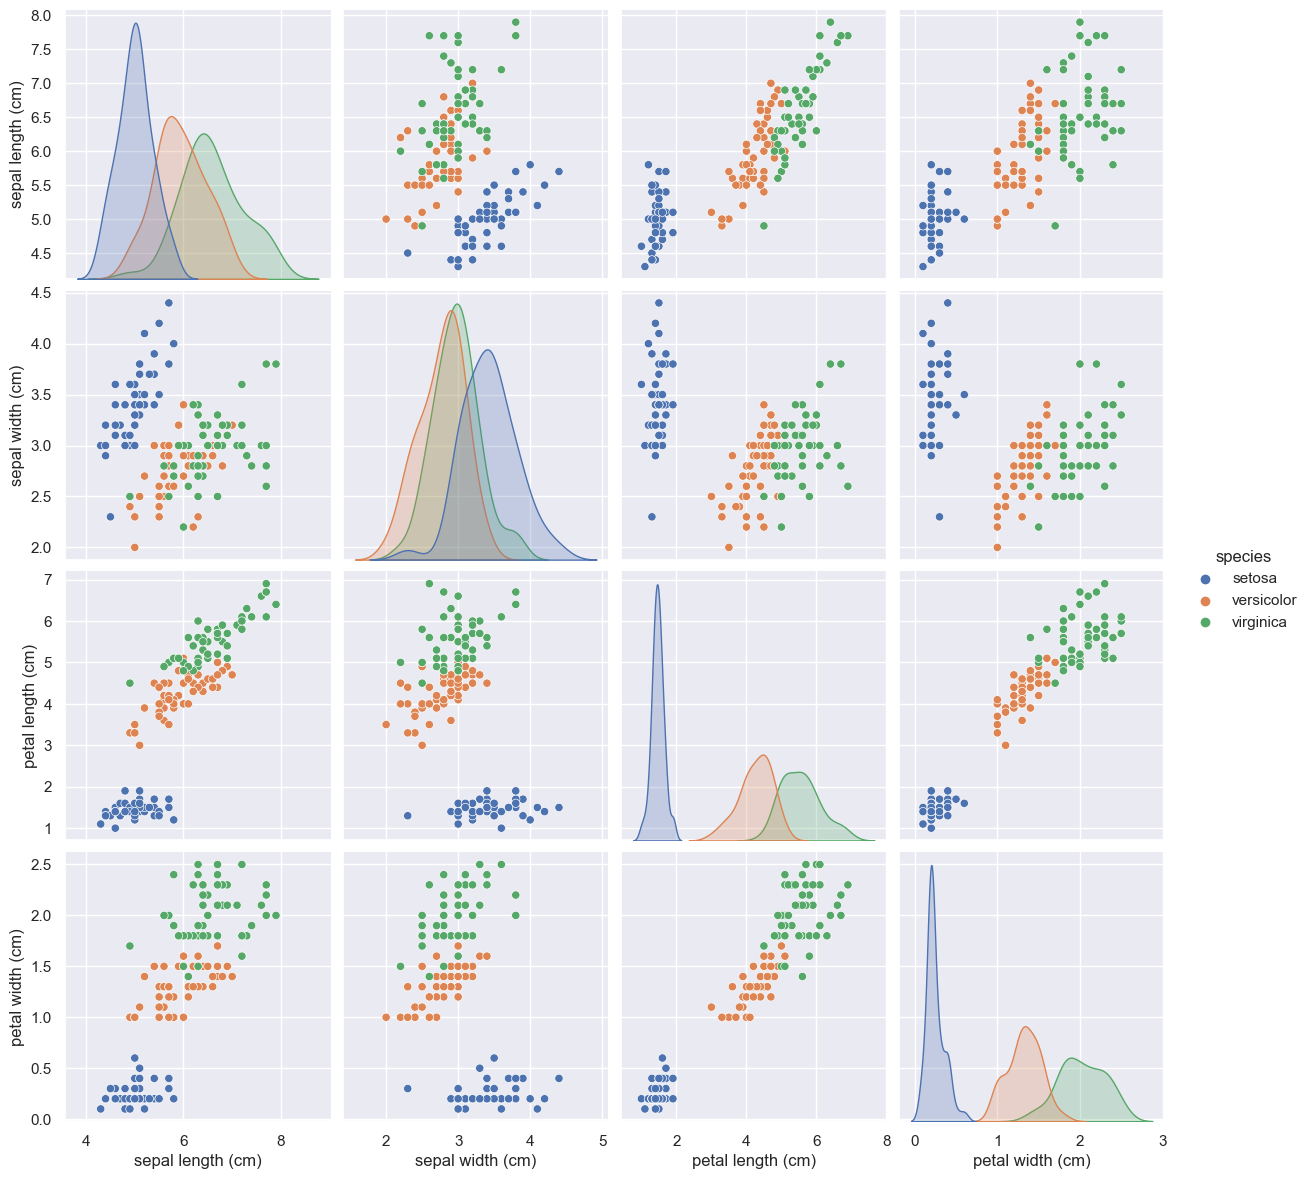

In [3]:
sns.pairplot(df_iris, hue="species", height=3, kind='scatter');
plt.savefig('iris_pairplot.png')

In [4]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Let's have a look at a different dataset
tips = sns.load_dataset('tips')
print(type(tips))
print(tips.head())
# Let's give time a numeric equivalent

<class 'pandas.core.frame.DataFrame'>
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [5]:
# let's add numerical equivalent for time
print(tips.time.unique())
# tips['meal'] = tips['time'].map({'Lunch': 1.0, 'Dinner': 2.0})
tips['meal'] = pd.Categorical(tips.time).codes
print(tips.day.unique())
tips['dow'] = pd.Categorical(tips.day).codes
dsow = ['Thur', 'Fri', 'Sat', 'Sun']
tips['dow'] = tips['day'].apply(lambda x: dsow.index(x))
tips.dow = tips.dow.astype('int8')
print(tips.head())
print(tips.dtypes)

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']
   total_bill   tip     sex smoker  day    time  size  meal  dow
0       16.99  1.01  Female     No  Sun  Dinner     2     1    3
1       10.34  1.66    Male     No  Sun  Dinner     3     1    3
2       21.01  3.50    Male     No  Sun  Dinner     3     1    3
3       23.68  3.31    Male     No  Sun  Dinner     2     1    3
4       24.59  3.61  Female     No  Sun  Dinner     4     1    3
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
meal              int8
dow               int8
dtype: object


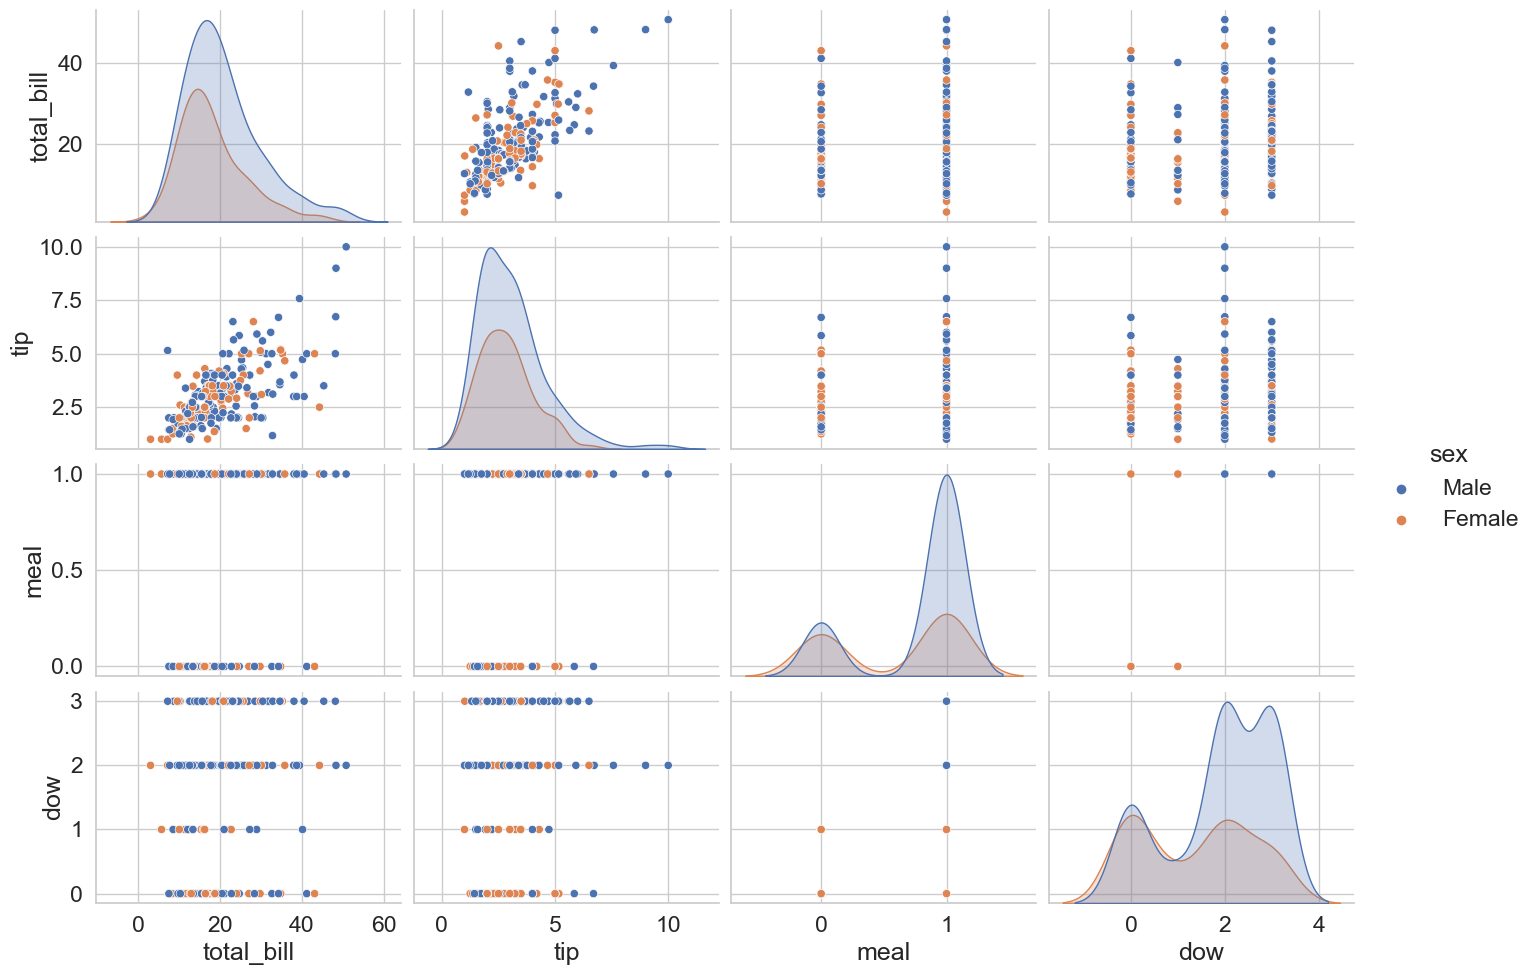

In [6]:
g = sns.pairplot(tips, hue="sex", vars=['total_bill', 'tip', 'meal', 'dow'], height=2.5, aspect=1.4, kind='scatter');
g.savefig('tips_pairplot.png')

While research things, I came across some other Seaborn options. So thought I'd have a quick look at those as well.

With the first, `relplot()`, I will have a look at some of the same variables as in the pairplot above. Don't believe I can include them all. The second, `jointplot()`, mostly just cuz.

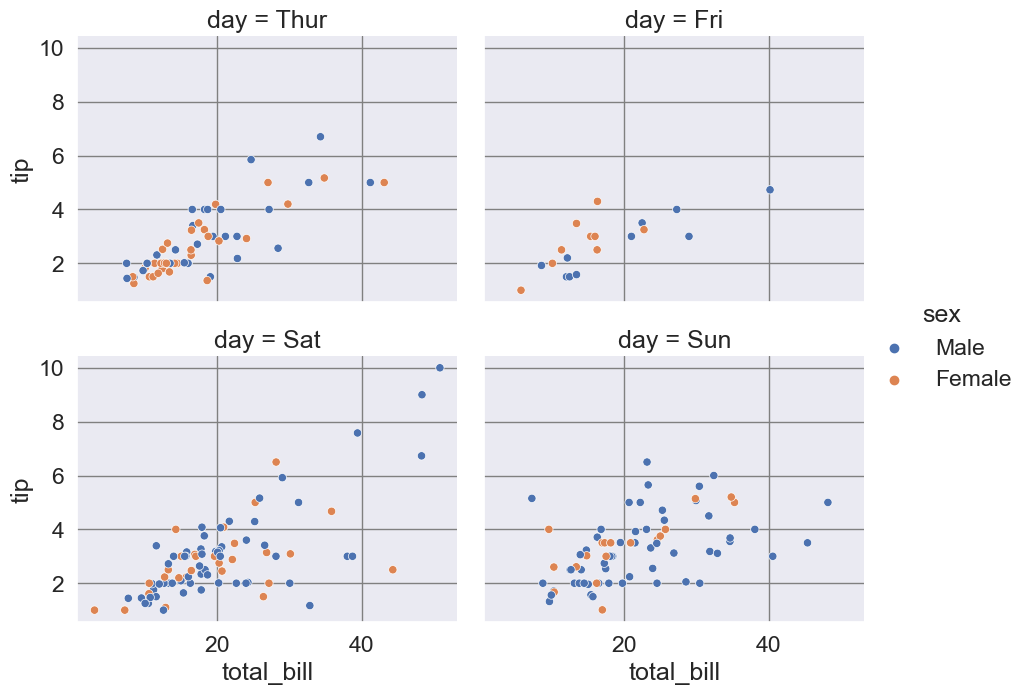

In [7]:
# this isn't the simplest form, but...
with sns.axes_style("darkgrid", {'grid.color': '.5'}):
    sns.relplot(data=tips, x="total_bill", y="tip", hue="sex", col="day", col_wrap=2, height=3.5, aspect=1.25)

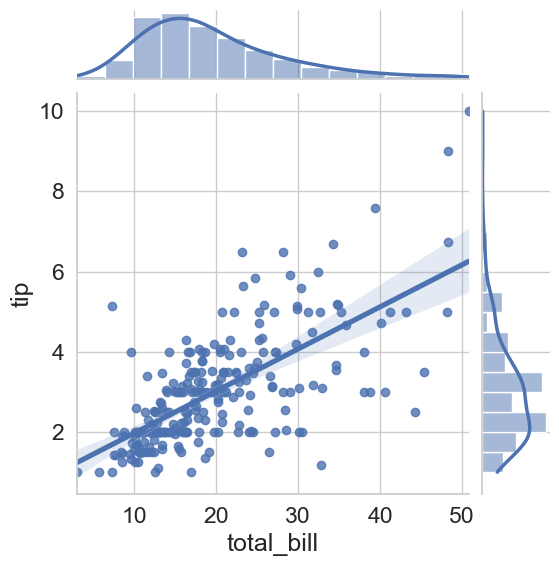

In [8]:
# kernel density estimation and regression
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

[32.5732899  71.03448276 41.66666667]


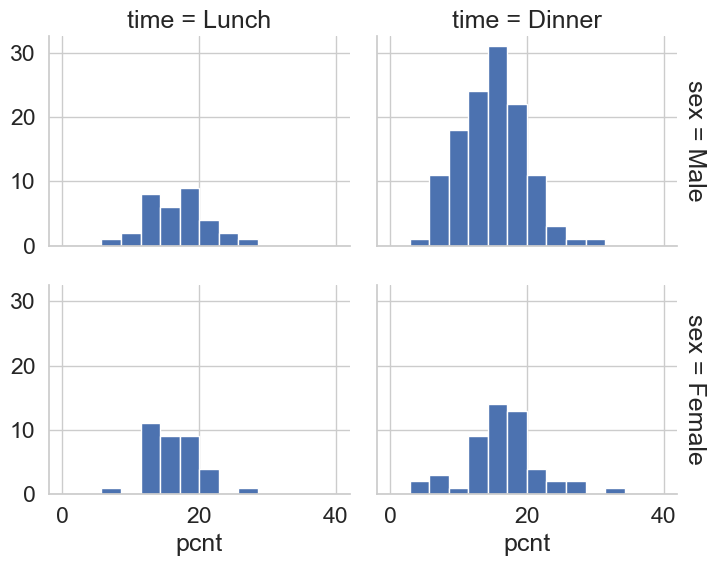

In [9]:
# okay let's have a quick look at using histograms to evaluate the data
# will use facetgrid, this will be somewhat similar to the relplot above
tips['pcnt'] = 100 * tips['tip'] / tips['total_bill']
pcnts = tips['pcnt'].unique()
gt30 = pcnts > 30
print(pcnts[gt30])
# couple of outliers, so let's just plot values from 0 - 40, with 15 bins

g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True, height=3, aspect=1.25)
g.map(plt.hist, "pcnt", bins=np.linspace(0, 40, 15));


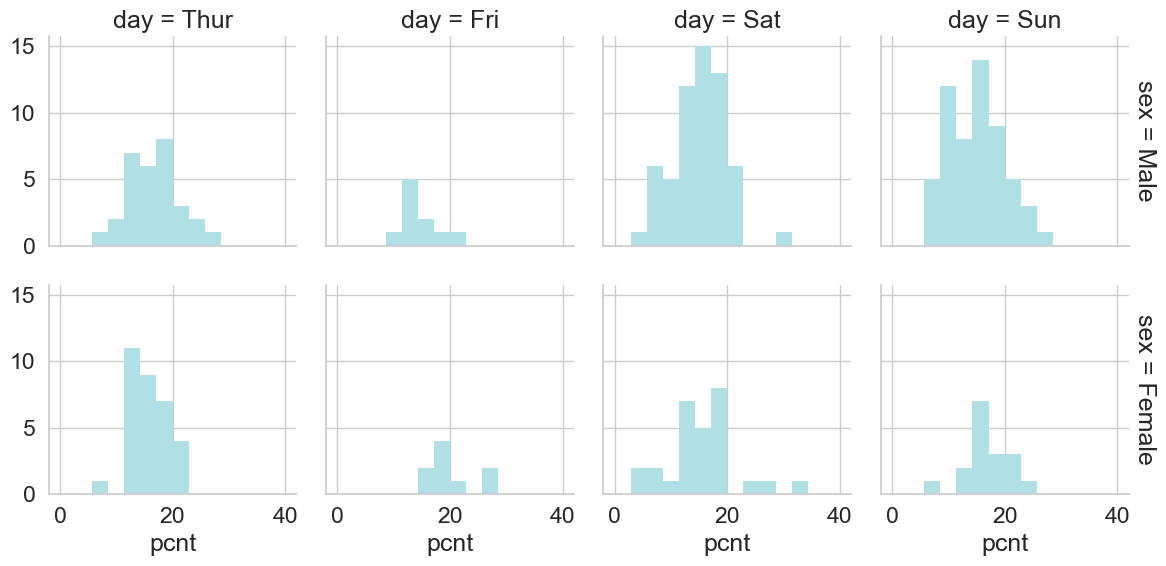

In [20]:
# let's try that with day of week, and some other histogram options just cuz
g = sns.FacetGrid(tips, row="sex", col="day", margin_titles=True, height=3)
g.map(plt.hist, "pcnt", bins=np.linspace(0, 40, 15), histtype='stepfilled', color='powderblue', edgecolor='none');